In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# 1. Introduction to a neural network

In this workshop we are going to manually build a small neural network. The aim is to solve the so called XOR problem, which is described more below. 

To start with, we can take a look at a scetch of the network we are going to build.

The network goes from the bottom to the top. Horizontally, we have the layers. Each layer consists of one or two nodes. Each such node is called a "perceptron", and each perceptron takes some input and transforms it to some output. Since we have several layers, this network is called a multi-layer perceptron. It can be used to solve different kinds of problems, such as classifying objects in pictures or estimating revenue for a company.

The fact that the data flows from bottom to top is called *forward propagation* and a network with this architecture is therefore also called a *feed-forward network*. 



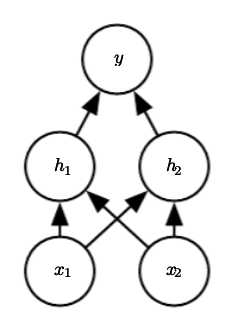

# 2. The XOR problem

XOR, or "exclusive or" problem, is a classic problem that have been tackled by deep learning historically. The function should return True (1) if one of the inputs are 1 and the other is 0, otherwise it should return False (0).

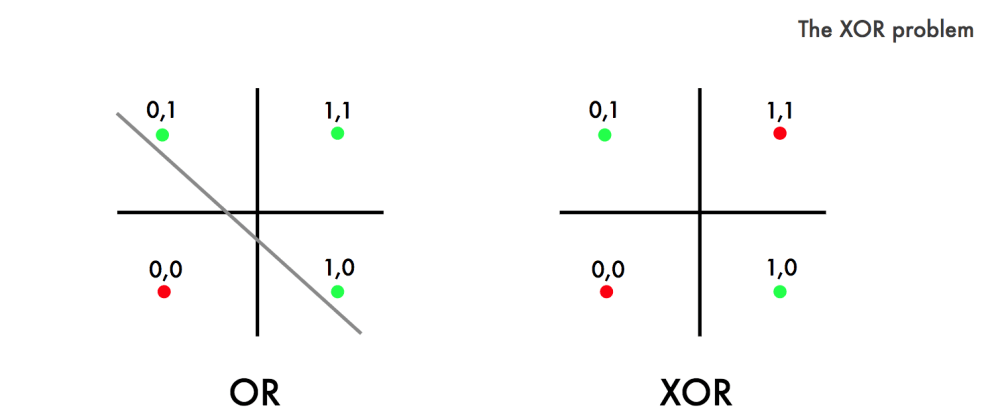

$x_1$ | $x_2$ | $y$
--- | --- | ---
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0


**Vectors**

To deal with all the input, we gather them in vectors. A vector is like a list that holds several values in it. 

For example the vector $\boldsymbol{x} = [1, 2]$, where the first value $x_1 = 1$ and the second value $x_2 = 2$. So $\boldsymbol{x} = [x_1, x_2]$.

In [ ]:
# Define our four possible inputs


In [ ]:
# Let's take a look


So what is actually happening inside a perceptron?

1. Every input is being multiplied by a weight
2. All the weighted inputs are added together with a bias
3. The sum is passed through an activation function

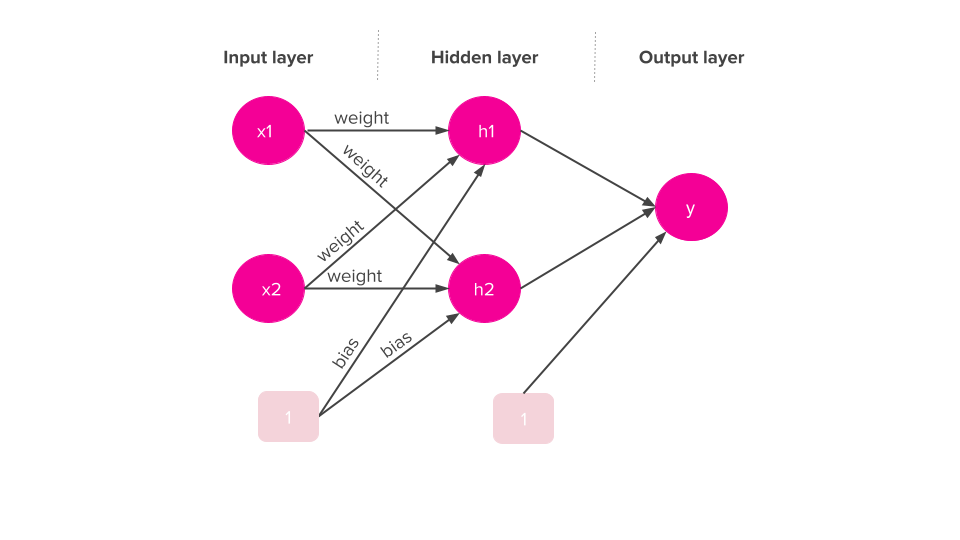

**What is happening?**
input --> sum($x_1 \cdot weight + x_2 \cdot weight + bias$) --> activation function --> input to next layer

When all nodes are connected to each other, the layer is called *fully connected* or *Dense*.

# 3. Set-up the network architecture by functions

In [ ]:
# Define the first layer


In [ ]:
# Define the hidden layer


In [ ]:
# Define the last layer


In [ ]:
# Parameters


Let's try the layers!

In [ ]:
# Try the input layer on the first input


In [ ]:
# Try the input layer on the second input


In [ ]:
# Try the next layer on the second input


In [ ]:
# Try all layers


In [ ]:
# Define the activation function


In [ ]:
# Let's combine all the layers and the activation function into one function - one neural network!


In [ ]:
# Let's try it on the first example of input


In [ ]:
# Run for all examples


**Table of input and expected output**

Input | $x_1$ | $x_2$ | $y$
--- | --- | --- | ---
1 | 0 | 0 | 0
2 | 0 | 1 | 1
3 | 1 | 0 | 1
4 | 1 | 1 | 0

In [ ]:
# Define our right output


# 4. Decide on evaluation method

What do we want to achieve? To have as little difference between the true value and the neural network output as possible. Let's calculate the difference between the actual and expected output, and take the average of this. When we tweak and tune the network, this is what we will be looking to minimize. It is called a *loss function*. This specific loss function is called *Mean Absolute Error* (MAE). 

$$ MAE = \frac{1}{n} \sum{\mid y_i - \hat{y_i} \mid} $$

In [ ]:
# Calculate MAE


In [ ]:
# Define our loss function


In [ ]:
# Try the loss function


# 5. "Train" the model - optimize the parameters

What are we actually doing? We want to choose parameters so that the loss is minimized. The parameters are the weight and bias. First, let's them as inputs to the neural network so that we can optimize them.

In [ ]:
# First layer is unchanged, it doesn't have any parameters to start with, it just takes the input


In [ ]:
# Redefine the hidden layer


In [ ]:
# Define the last layer


In [ ]:
# Redefine the network function


In [ ]:
# Redefine loss function


Let's check the loss for some different values on the weight and the bias!

In [ ]:
# Calculate and check loss for weight = 2 and bias = 5


In [ ]:
# Calculate and check loss for weight = 0 and bias = 0


In [ ]:
# Calculate and check loss for weight = 1 and bias = 0


In [ ]:
# Calculate and check loss for weight = 1 and bias = 1


In [ ]:
# Let's try some different combinations in a grid and check their loss value


In [ ]:
# Print the weights

In [ ]:
# Print the biases


In [ ]:
# Print parameters to inspect the object


In [ ]:
# Run all the combinations through the loss function to check minimization


In [ ]:
# Let's check the result


In [ ]:
# Loss is minimized if we use weight = 0 and bias = 0 or bias = 1
# Let's see if it solves the problem


In [ ]:
# Check output


Conclusion: Looks like it didn't solve the problem :( 
We need something more flexible!

# 6. Introducing the super duper flexible neural network!

Each combination of node and input will get it's VERY OWN weight, and then each perceptron will get it's very own bias!

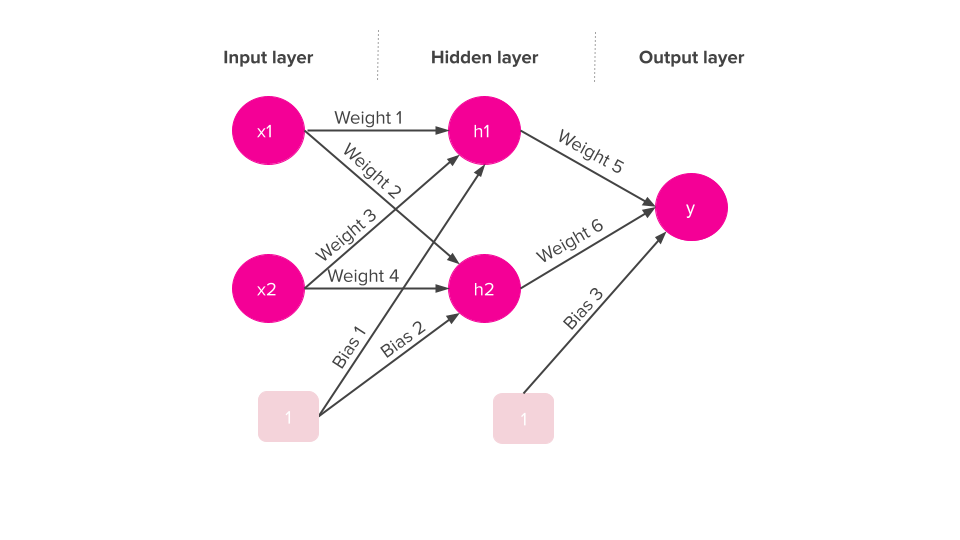

In [ ]:
# Redefine the hidden layer


In [ ]:
# Redefine the last layer


In [ ]:
# Redefine the network function


In [ ]:
# Try it


In [ ]:
# Redefine the loss function with all the new parameters


Now, how do we choose the right weight and bias so that we minimize the loss? In other words, how to we optimize the network? Since we have so many weights and biases now it's really hard to visualize it like we did before. But we can try with some different options!

In [ ]:
# Testing some different weight and biases


In [ ]:
# Testing some different weight and biases


In [ ]:
# Testing some different weight and biases


In [ ]:
# Try your own:



Why aren't we finding the solution? The reason has to do with "linearity" and "non-linearity", two concepts that can be hard to grasp but are very important in deep learning. 

As we move through the examples, the output need to move from 0 to 1 and then *drop back* to 0, which is an indication that the problem is "non-linear". If we look at the picture describing the problem in the beginning, we see that we cannot draw a line to separate the points and classify them correctly.

To solve this, we introduce an activation function. For this problem we will use of the most common ones, which takes all negative numbers in a vector and turn them to zeros. We will look more at this later on in the workshop, so do not worry if it is a little bit confusing right now.

# 7. The activation function solving the problem

In [ ]:
# Redefine the activation function


In [ ]:
# Correct one:


In [ ]:
# Check output


Voilá! The network has solved the problem 🦾 

But why did this activation function work? 🤔

This is best understood if we look at the output from the hidden layer. 

For this part, there is some ready-made code in the notebook that you can use to replicate my example. It's a bit more complicated, so it's also fine to just listen at this point. 

In [ ]:
# Check output of the hidden layer
hidden_output_1 = hidden_layer(input_layer(input_1), weight, bias)
hidden_output_2 = hidden_layer(input_layer(input_2), weight, bias)
hidden_output_3 = hidden_layer(input_layer(input_3), weight, bias)
hidden_output_4 = hidden_layer(input_layer(input_4), weight, bias)

print(f"first example hidden layer output: {hidden_output_1}")
print(f"second example hidden layer output: {hidden_output_2}")
print(f"third example hidden layer output: {hidden_output_3}")
print(f"fourth example hidden layer output: {hidden_output_4}")

In [ ]:
# Plot the examples
plt.scatter([hidden_output_1[0], hidden_output_2[0], hidden_output_3[0], hidden_output_4[0]],
            [hidden_output_1[1], hidden_output_2[1], hidden_output_3[1], hidden_output_4[1]],
            alpha = 0.5)
plt.show()

As we can see above, the examples are now laying along a straight line. They still cannot be separated by a line, like mentioned above. 

But the activation function changes this. Let's look what happens to the examples after we have passed the hidden layer output to the activation_function!

In [ ]:
# Check output of the activation function
activation_output_1 = activation_function(hidden_layer(input_layer(input_1), weight, bias))
activation_output_2 = activation_function(hidden_layer(input_layer(input_2), weight, bias))
activation_output_3 = activation_function(hidden_layer(input_layer(input_3), weight, bias))
activation_output_4 = activation_function(hidden_layer(input_layer(input_4), weight, bias))

print(f"first example activation function output: {activation_output_1}")
print(f"second example activation function output: {activation_output_2}")
print(f"third example activation function output: {activation_output_3}")
print(f"fourth example activation function output: {activation_output_4}")

In [ ]:
# Plot the examples
plt.scatter([activation_output_1[0], activation_output_2[0], activation_output_3[0], activation_output_4[0]],
            [activation_output_1[1], activation_output_2[1], activation_output_3[1], activation_output_4[1]],
            alpha = 0.5)
plt.show()

The examples now longer lie on a straight line! Instead they can be separated by a straight line, and all examples above the line can be classified with 0 and the ones below the line can be classified as 1. This is one of the strength of deep learning, that thanks to the activation functions, it can deal with non-linearity!

Ok, so we have found the solution! That's nice. However, this was very tiresome. How can we find the right parameters in a better way? This is what we will be looking at in the next notebook! 🤩